# 1. Hidden Layers

**single layer neural networks**

These networks had a single layer of neurons. To make a prediction, a single layer of neurons in these networks directly fed their results into the output neuron(s).

**multi-layer networks (also known as deep neural networks)**

are able to better capture nonlinearity in the data. In a deep neural network, the first layer of input neurons feeds into a second, intermediate layer of neurons

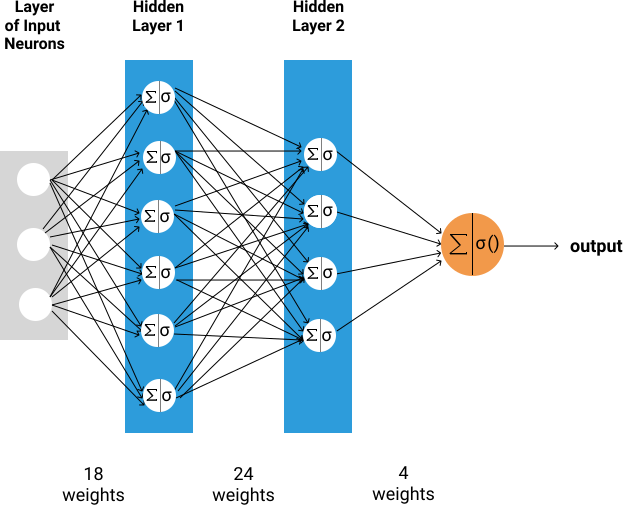

In [1]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/242/three_layer_network.svg')

**The intermediate layers are known as hidden layers,** because they aren't directly represented in the input data or the output predictions. Instead, we can think of each hidden layer as intermediate features that are learned during the training process.

`Each of these hidden layers has its own set of weights and biases, which are discovered during the training process`

# 2. Generating Data That Contains Nonlinearity

To generate data with nonlinearity in the features (both between the features and between the features and the target column), we can use the **`make_moons() `**function from scikit-learn:

By default, make_moons() will generate 100 rows of data with 2 features

 **Gaussian noise** is a kind of statistical noise that follows the Gaussian distribution, and it's a common way to try to recreate the noise that's often found in real world data.

We can use the noise parameter to specify the standard deviation of the Gaussian noise we want added to the data.

## TODO:
* Use the make_moons() function to generate data with nonlinearity:
  * Generate 100 values.
  * Set the random seed to 3.
  * Set the noise parameter to 0.04.
* Convert the NumPy array of generated features into a pandas dataframe and assign to features.
* Convert the NumPy array of generated labels into a pandas series and assign to labels.
* Generate a 3d scatter plot of the data:
  * Create a matplotlib figure object and set to figsize to (8,8).
  * Create and attach single axes object to this figure using the 3d projection: ax = fig.add_subplot(111, projection='3d')
  * Generate a 3d scatter plot with the first column from features on the x-axis, the second column from features on the y-axis and labels on the z-axis.
  * Set the labels 'x1', 'x2' and 'y', respectively.

In [2]:
from sklearn.datasets import make_moons
import pandas as pd 

data=make_moons(n_samples=100,random_state=3,noise=0.04)

features=pd.DataFrame(data[0])

labels=pd.Series(data[1])

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(features[0],features[1],labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

<Figure size 800x800 with 1 Axes>

# 3. Hidden Layer With A Single Neuron

The following GIF demonstrates how adding the sigmoid function enables a logistic regression model to capture nonlinearity more effectively:



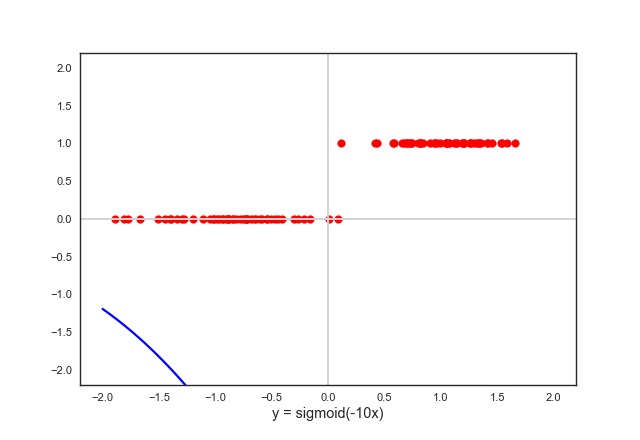

In [4]:
from IPython.display import Image
Image(filename='C:/Users/krishna/Desktop/Github repos/Data-Scientist-In-Python/Step 7_Machine learning intermediate/1.Deep Learning Fundamentals/log_model.gif')

We can think of a logistic regression model as a neural network with an activation function but no hidden layers. To make predictions, a linear combination of the features and weights is performed followed by a single sigmoid transformation.

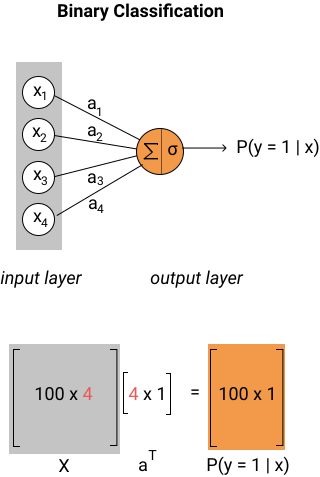

In [5]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/242/single_layer_network.svg')

To improve the expressive power, we can add a hidden layer of neurons in between the input layer and the output layer. Here's an example where we've added a single hidden layer with a single neuron in between the input layer and the output layer:



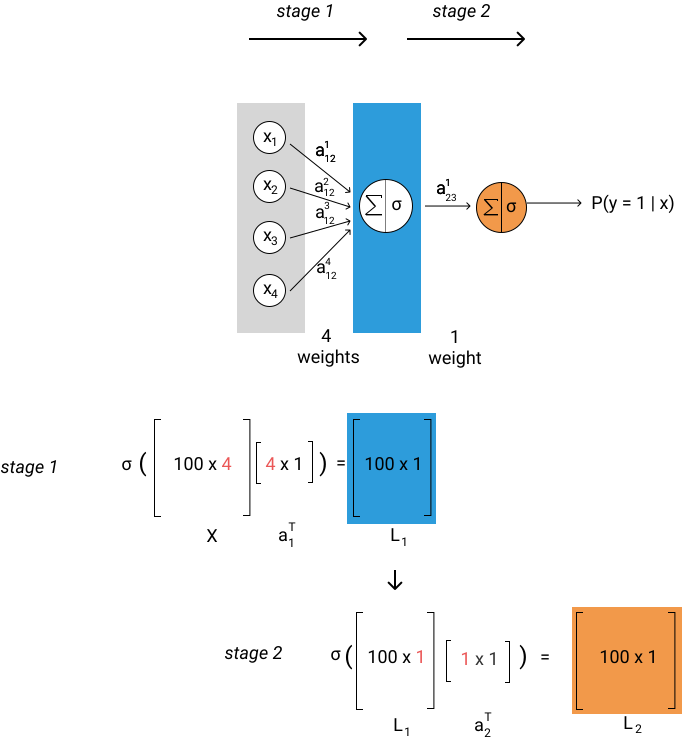

In [6]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/243/single_hidden_layer.svg')

This network contains two sets of weights that are learned during the training phase:

4 weights between the input layer and the hidden layer

1 weight between the hidden layer and the output layer

# 4. Training A Neural Network Using Scikit-learn

Scikit-learn contains two classes for working with neural networks:

* MLPClassifier
* MLPRegressor

We can specify the activation function we want used in all layers using the activation parameter. This parameter accepts only the following string values:

* 'identity': the identity function
* 'logistic': the sigmoid function
* 'tanh': the hyperbolic tangent (tanh) function
* 'relu': the ReLU function

mlp = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic')

## TODO:
* Train two different models using scikit-learn on the training set:
  * A standard logistic regression model
  * A neural network with:
    * A single hidden layer
    * A single neuron in the hidden layer
    * The sigmoid activation function
* Make and assign predictions (for answer checking purposes the order should be respected):
  * Make predictions on the test set using the neural network model and assign to nn_predictions
  * Make predictions on the test set using the logistic regression model and assign to log_predictions
* Compute the accuracy score for log_predictions and assign to log_accuracy.
* Compute the accuracy score for log_predictions and assign to nn_accuracy.
* Print both log_accuracy and nn_accuracy.

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np
np.random.seed(8)

While scikit-learn is friendly to use when learning new concepts, it has a few limitations when it comes to working with neural networks in production.

At the time of writing, scikit-learn only `supports using the same activation function for all layers.`
Scikit-learn also `struggles to scale to larger datasets`.
Libraries like Theano and TensorFlow `support offloading some computation to the GPU to overcome bottlenecks.`

In [8]:
data=make_moons(n_samples=100,random_state=3,noise=0.04)
features=pd.DataFrame(data[0])
labels=pd.Series(data[1])
features['bias']=1
features.index

RangeIndex(start=0, stop=100, step=1)

In [9]:
shuffled_index=np.random.permutation(features.index)
shuffled_data=features.loc[shuffled_index]
shuffled_labels=labels.loc[shuffled_index]

In [10]:
mid_length=int(len(shuffled_data)/2)

train_features=shuffled_data.iloc[0:mid_length]
test_features=shuffled_data.iloc[mid_length:len(shuffled_data)]

train_labels=shuffled_labels.iloc[0:mid_length]
test_labels=shuffled_labels.iloc[mid_length:len(shuffled_labels)]

In [11]:
mlp=MLPClassifier(hidden_layer_sizes=(1,),activation='logistic')
mlp.fit(train_features,train_labels)
nn_predictions=mlp.predict(test_features)
nn_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [12]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(train_features,train_labels)
log_predictions=lr.predict(test_features)
log_predictions

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [13]:
nn_accuracy=accuracy_score(test_labels,nn_predictions)
log_accuracy=accuracy_score(test_labels,log_predictions)

In [14]:
print("Logistic Regression Model Accuracy: ", log_accuracy*100)
print("Single Neuron Single Layer NN Model Accuracy: ", nn_accuracy*100)

Logistic Regression Model Accuracy:  88.0
Single Neuron Single Layer NN Model Accuracy:  48.0


# 5. Hidden Layer With Multiple Neurons

The logistic regression model performed much better (accuracy of 88%) compared to the neural network model with one hidden layer and one neuron (48%). This network architecture doesn't give the model much ability to capture nonlinearity in the data unfortunately, which is why logistic regression performed much better.

`Because every neuron has a connection between itself and all of the neurons in the next layer, this is known as a fully connected network. Lastly, because the computation flows from left (input layer) to right (hidden layer then to output layer), we can call this network a fully connected, feedforward network.`

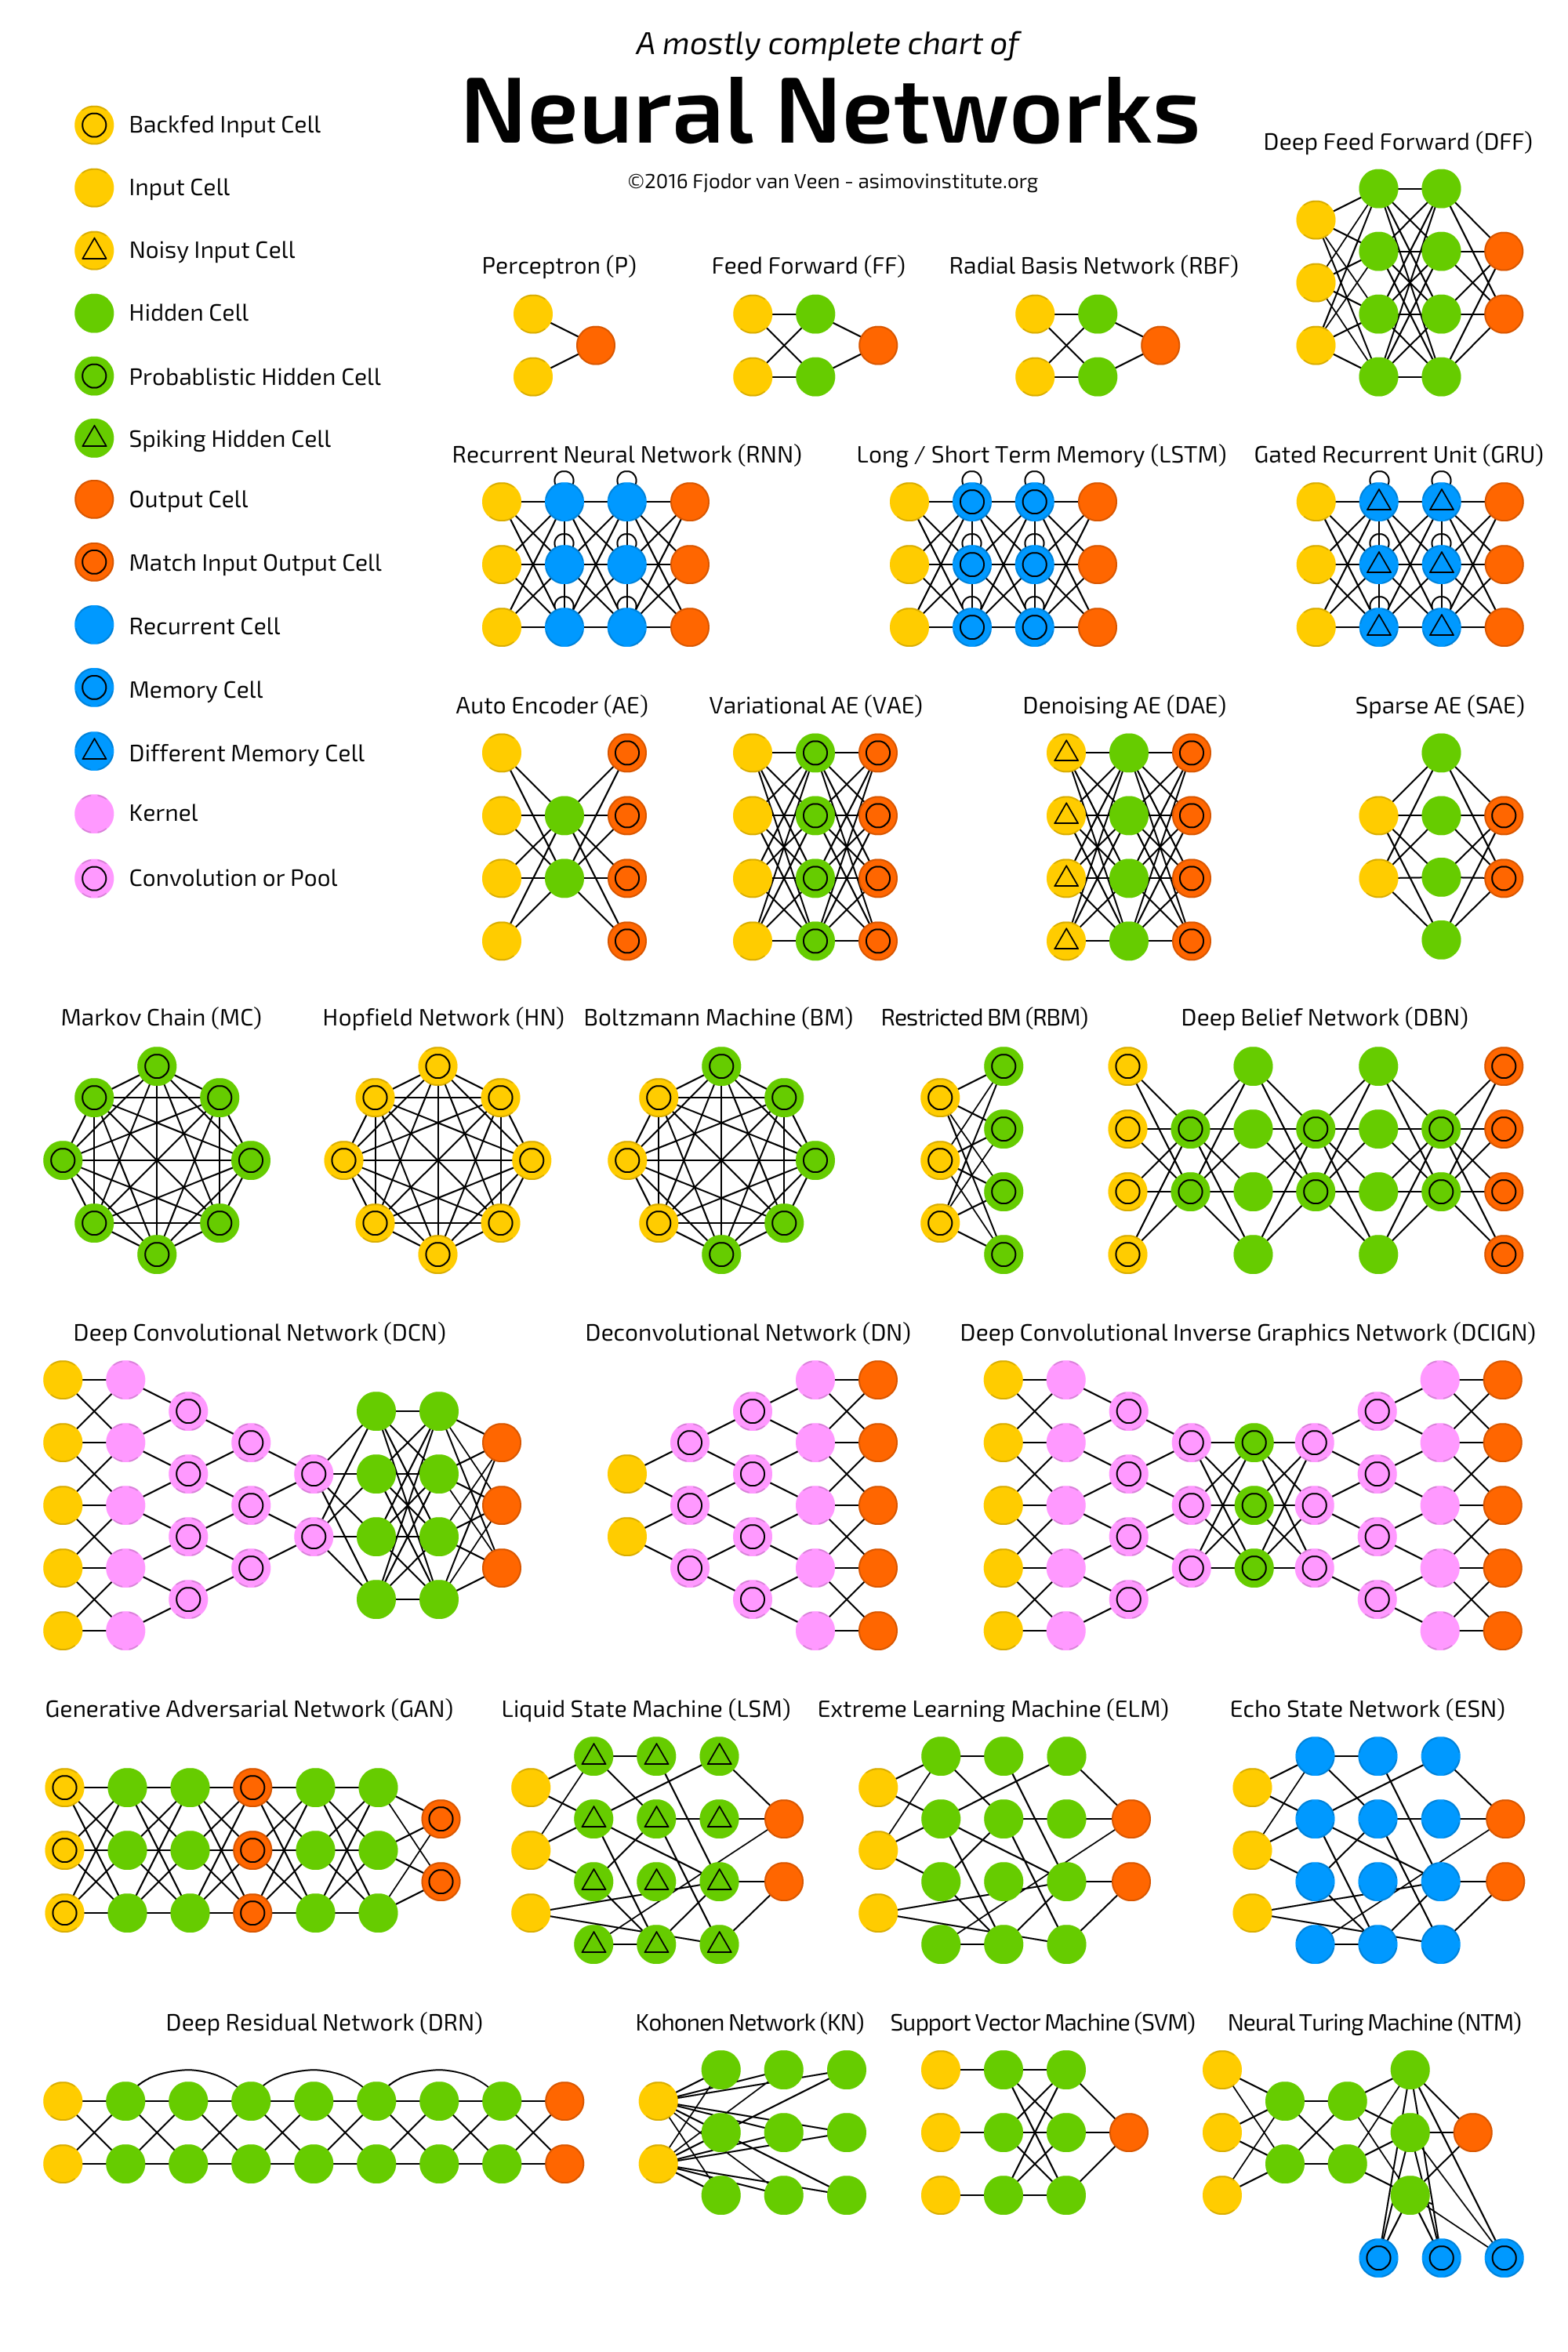

In [15]:
from IPython.display import Image
Image(filename='C:/Users/krishna/Desktop/Github repos/Data-Scientist-In-Python/Step 7_Machine learning intermediate/1.Deep Learning Fundamentals/neural_network_zoo.png')

# 5. Hidden Layer With Multiple Neurons

## TODO:
* Create the following list of neuron counts and assign to neurons: [1, 5, 10, 15, 20, 25]
* Create an empty list named accuracies.
* For each value in neurons:
  * Train a neural network:
    * with the number of neurons in the hidden layer set to the current value
    * using the sigmoid activation function
    * on the training set
  * Make predictions on the test set and compute the accuracy value.
  * Append the accuracy value to accuracies.
* Print accuracies.

In [16]:
neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic',max_iter=10000)
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(accuracies)

[0.88, 0.84, 0.88, 0.88, 0.88, 0.88]


It seems like the test set prediction accuracy improved to 0.84 when using ten or fifteen neurons in the hidden layer. As we increased the number of neurons in the hidden layer, the accuracy vastly improved between the models:

**Next, we can observe the effect of increasing the number of hidden layers on the overall accuracy of the network**

* **`To determine the number of weights between the layers, multiply the number of neurons between those two layers. Remember that these weights will be represented as weight matrices.`**

* To specify the number of hidden layers and the number of neurons in each hidden layer, we change the tuple we pass in to the hidden_layer_sizes parameter:

**Network with 2 hidden layers, 1 neuron in each hidden layer**

mlp = MLPClassifier(hidden_layer_sizes=(1,1), activation='logistic')

**Network with 3 hidden layers of varying neuron counts in each hidden layer**

mlp = MLPClassifier(hidden_layer_sizes=(2,6,10), activation='logistic')

### The number of hidden layers and number of neurons in each hidden layer are hyperparameters that act as knobs for the model behavior.

Neural networks often tend to take a long time to converge during the training process and many libraries have default values for the number of iterations of gradient descent to run. We can increase the number of iterations of gradient descent that's performed during the training process by modifying the max_iter parameter, which is set to 200 by default.

## TODO:
* Create a the following list of neuron counts and assign to neurons: [1, 5, 10, 15, 20, 25]
* Create an empty list named nn_accuracies.
* For each value in neurons:
   * Train a neural network:
     * with two hidden layers, each containing the same number of neurons (the current value in neurons)
     * using the relu activation function
     * using 1000 iterations of gradient descent
     * on the training set
   * Make predictions on the test set and compute the accuracy value.
   * Append the accuracy value to nn_accuracies.
* Print nn_accuracies.

In [17]:
neurons = [1, 5, 10, 15, 20, 25]
nn_accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter=1000)
    
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    
    accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(accuracy)

print(nn_accuracies)

[0.48, 0.88, 0.9, 1.0, 1.0, 1.0]


As we increased the number of neurons in each layer, it looks like the accuracy increased all the way to 100%! Even though this is a toy dataset (most real world data is much noisier), this is impressive and demonstrates the ability of neural networks to learn more complex decision boundaries.